In [4]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
saharnazyaghoobpoor_happy_and_sad_image_path = kagglehub.dataset_download('saharnazyaghoobpoor/happy-and-sad-image')

print('Data source import complete.')


100%|██████████| 67.8M/67.8M [00:01<00:00, 60.0MB/s]

Extracting files...


Data source import complete.


In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mirellanayara22","key":"c332d88dc4519f5588d673e4d8945d4f"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#mueve el json al directorio correcto

In [7]:
#descagamos el dataset
!kaggle datasets download -d saharnazyaghoobpoor/happy-and-sad-image

Dataset URL: https://www.kaggle.com/datasets/saharnazyaghoobpoor/happy-and-sad-image
License(s): CC0-1.0
 90% 61.0M/67.8M [00:00<00:00, 119MB/s]
100% 67.8M/67.8M [00:00<00:00, 109MB/s]


In [8]:
#descomprimimos
!unzip happy-and-sad-image.zip -d happy_and_sad

Archive:  happy-and-sad-image.zip
  inflating: happy_and_sad/data/happy/05-12-21-happy-people.jpg  
  inflating: happy_and_sad/data/happy/07-120104-happy_people_are_not_nice_people.jpg  
  inflating: happy_and_sad/data/happy/1-2.jpg  
  inflating: happy_and_sad/data/happy/1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg  
  inflating: happy_and_sad/data/happy/11-Habits-of-Truly-Happy-People.jpg  
  inflating: happy_and_sad/data/happy/154006829.jpg  
  inflating: happy_and_sad/data/happy/170404-happy-workers-feature.jpg  
  inflating: happy_and_sad/data/happy/1902539.jpg  
  inflating: happy_and_sad/data/happy/1902540.jpg  
  inflating: happy_and_sad/data/happy/1902587.jpg  
  inflating: happy_and_sad/data/happy/1920px-face-smile.svg_.png.jpg  
  inflating: happy_and_sad/data/happy/1HEoLBLidT2u4mhJ0oiDgig.png  
  inflating: happy_and_sad/data/happy/227-2271622_happy-people-business-team-celebrating-png.png  
  inflating: happy_and_sad/data/happy/7-Habits-of-Happy-People-image.jpeg  

In [6]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [9]:
import tensorflow as tf
import os

In [10]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [11]:
tf.config.list_physical_devices('GPU')

[]

In [12]:
import cv2

In [13]:
import imghdr

In [14]:
data_dir = '/content/happy_and_sad/data'

In [15]:
os.listdir(data_dir)

['sad', 'happy']

In [16]:
image_exts = [ 'jpeg','jpg' ,'bmp' ,'png']

In [17]:
for image_class in os.listdir(data_dir):
    image_class_path = os.path.join(data_dir, image_class)
    if os.path.isdir(image_class_path):
        for image in os.listdir(image_class_path):
            image_path = os.path.join(image_class_path, image)
        try:
             img = cv2.imread(image_path)
             tip = imghdr.what(image_path)
             if tip not in image_exts:
                 print('image not ext list {}'.format(image_path))
                 os.remove(image_path)
        except Exception as e :
             print ('Issue with image {}'.format(image_path))
             #os.remove(image_path)

In [18]:
import numpy as np
from matplotlib import pyplot as plt

In [19]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)

Found 171 files belonging to 2 classes.


In [20]:
data_iterator = data.as_numpy_iterator()

In [21]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7fb9f60fee90>)

In [22]:
batch = data_iterator.next()

In [23]:
batch[0].shape

(32, 256, 256, 3)

In [24]:
batch[1]

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int32)

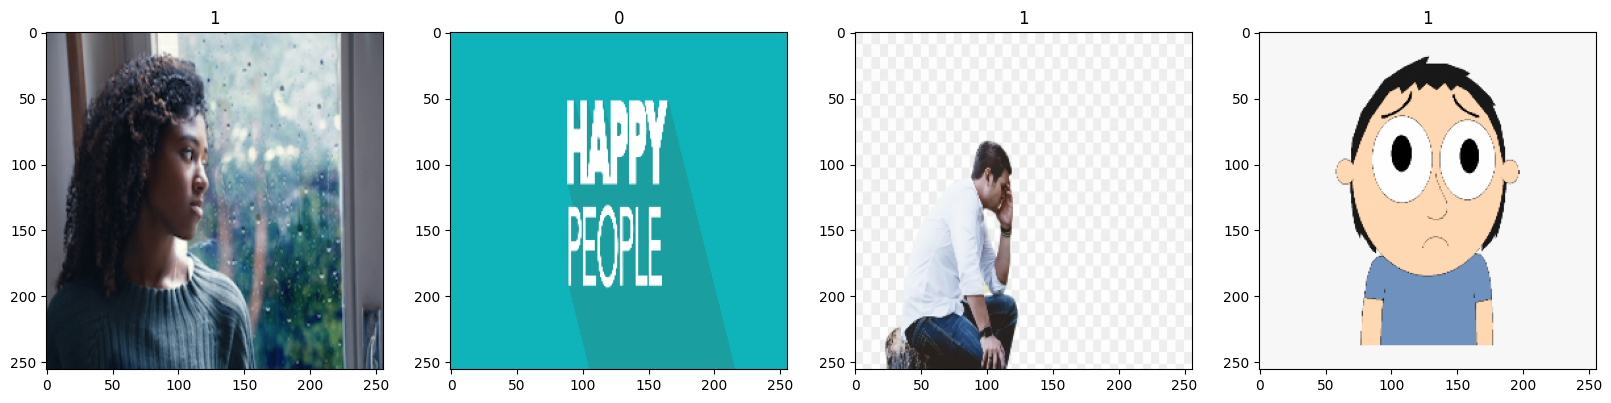

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Preprocess Data

In [26]:
scaled =data.map(lambda x,y: (x/255,y))

In [27]:
scaled_iterator = data.as_numpy_iterator()

In [28]:
batch = scaled_iterator.next()

In [29]:
batch[0].max()

255.0

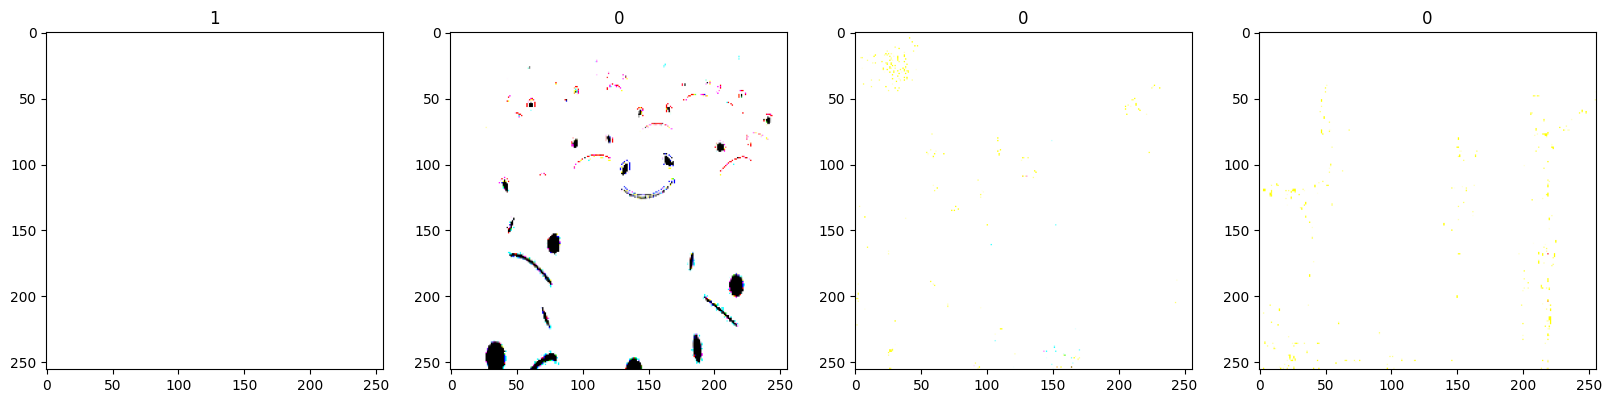

In [30]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### split Data

In [31]:
len(data)

6

In [32]:
train_size = int (len (data)*.6)
val_size = int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [33]:
train_size+val_size+test_size

6

In [34]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [35]:
len(train)

3

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

model = Sequential([Conv2d])

In [37]:
model = Sequential()

In [38]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics =['accuracy'])

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
logdir ='logs'

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist = model.fit(train, epochs=50, validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.5638 - loss: 109.3543 - val_accuracy: 0.6250 - val_loss: 3.1097
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.5365 - loss: 5.4157 - val_accuracy: 0.4531 - val_loss: 1.5748
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.4661 - loss: 1.3752 - val_accuracy: 0.8281 - val_loss: 0.4416
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.8190 - loss: 0.4199 - val_accuracy: 0.8125 - val_loss: 0.4665
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.7630 - loss: 0.4775 - val_accuracy: 0.8125 - val_loss: 0.3584
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.8841 - loss: 0.3215 - val_accuracy: 0.9375 - val_loss: 0.2393
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step - accuracy: 0.9076 - loss: 0.2224 - val_accuracy: 0.9844 - val_loss: 0.0709
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.9727 - loss: 0.0919 - val_accuracy: 0.9219 - val_loss: 0.2954
Epoch 

### Train

In [44]:
logdir='logs'

In [45]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

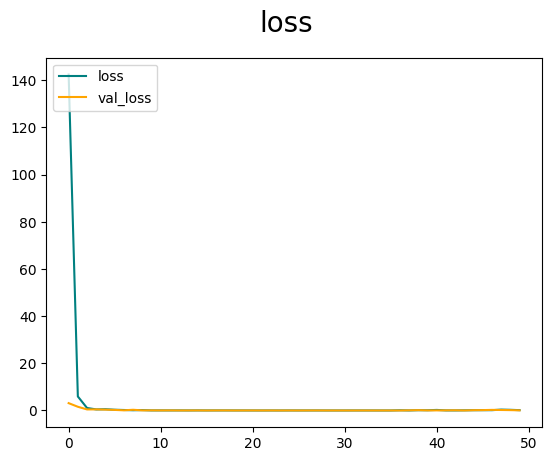

In [46]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'],color = 'orange', label = 'val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

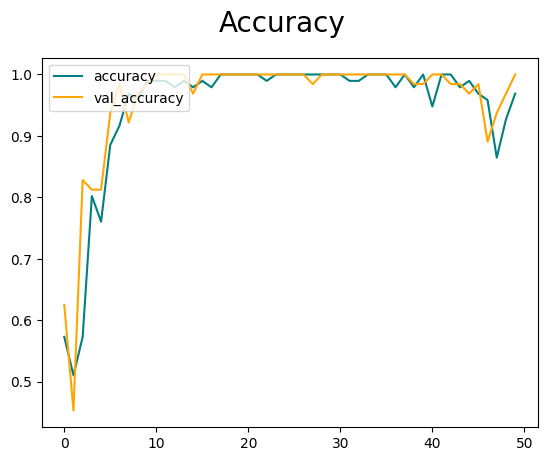

In [47]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Evaluate Performance

In [48]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [49]:
pre = Precision()
re = Recall()
acc= BinaryAccuracy()

In [50]:
len(test)

1

In [51]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


In [52]:
print(f'Precision :{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision :1.0,Recall:1.0,Accuracy:1.0


#### Test

In [53]:
import  cv2

In [55]:
import os

# List the contents of the happy-and-sad-image directory
print(os.listdir('/content/happy_and_sad'))


['sad.jpg', 'data', 'very-happy-people.jpg', 'saadgirl.jpg', 'happy.jpg']


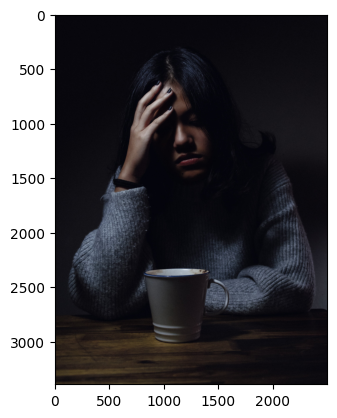

In [62]:
img = cv2.imread('/content/happy_and_sad/saadgirl.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

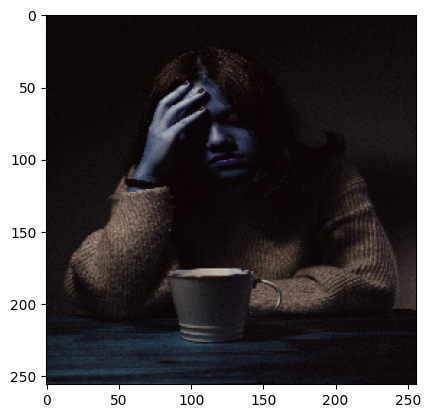

In [63]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [64]:
resize.shape

TensorShape([256, 256, 3])

In [65]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [66]:
yhat

array([[0.51120514]], dtype=float32)

In [67]:
if yhat > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is Happy')

Predicted class is sad


### Save the Model

In [68]:
from tensorflow.keras.models import load_model

In [69]:
model.save(os.path.join('model','happysadmodel.h5'))

In [70]:
new_model = load_model(os.path.join('model','happysadmodel.h5'))

In [71]:
new_model

<Sequential name=sequential, built=True>

In [72]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


array([[0.51120514]], dtype=float32)

In [73]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [74]:
if yhatnew > 0.5:
    print(f'Predicted class is sad')
else:
    print(f'Predicted class is Happy')

Predicted class is sad


In [75]:
!pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 891.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 74.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully un

In [76]:
!mkdir carpeta_salida

In [77]:
!tensorflowjs_converter --input_format keras happysadmodel.h5 carpeta_salida

2024-11-19 22:08:12.314414: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732054092.382537    7921 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732054092.420675    7921 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 959, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/usr/local/lib/python3.10/dist-package